In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import yaml

In [8]:
with open("../config.yaml","r") as f:
    config = yaml.safe_load(f)

PROCESSED_DATA_PATH = '../'+config['data']['processed_path']
processed_file_path = os.path.join(PROCESSED_DATA_PATH, 'dataset.csv')

df = pd.read_csv(processed_file_path)
print("Preprocessed Data loaded: ",df.shape)
df.head()

Preprocessed Data loaded:  (99837, 6)


,flight_record,departure_airport,departure_runway,arrival_airport,arrival_runway,label
0,-1.756027,177,72,63,86,0
1,-1.756027,134,85,60,31,0
2,-1.756027,130,28,63,87,0
3,-1.756027,134,23,77,20,0
4,-1.756027,163,79,63,87,0


C:\Users\sachi\AppData\Local\Temp\ipykernel_12424\1969009832.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




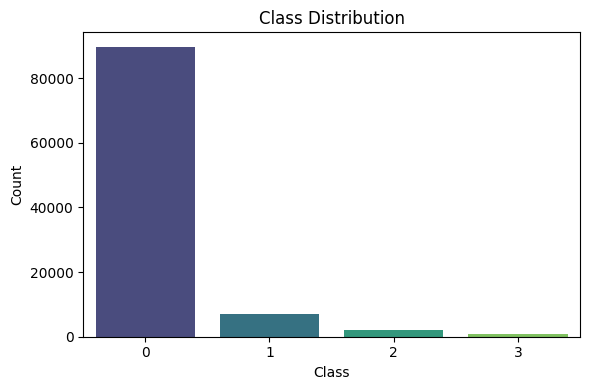

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=df['label'], palette='viridis', hue=None)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Save for Streamlit use
# plt.savefig(os.path.join(PROCESSED_DATA_PATH, "class_distribution.png"))


In [14]:
# # Pie chart with Plotly
# fig = px.pie(df, names=df['label'], title="Class Distribution (Interactive)")
# fig.show()

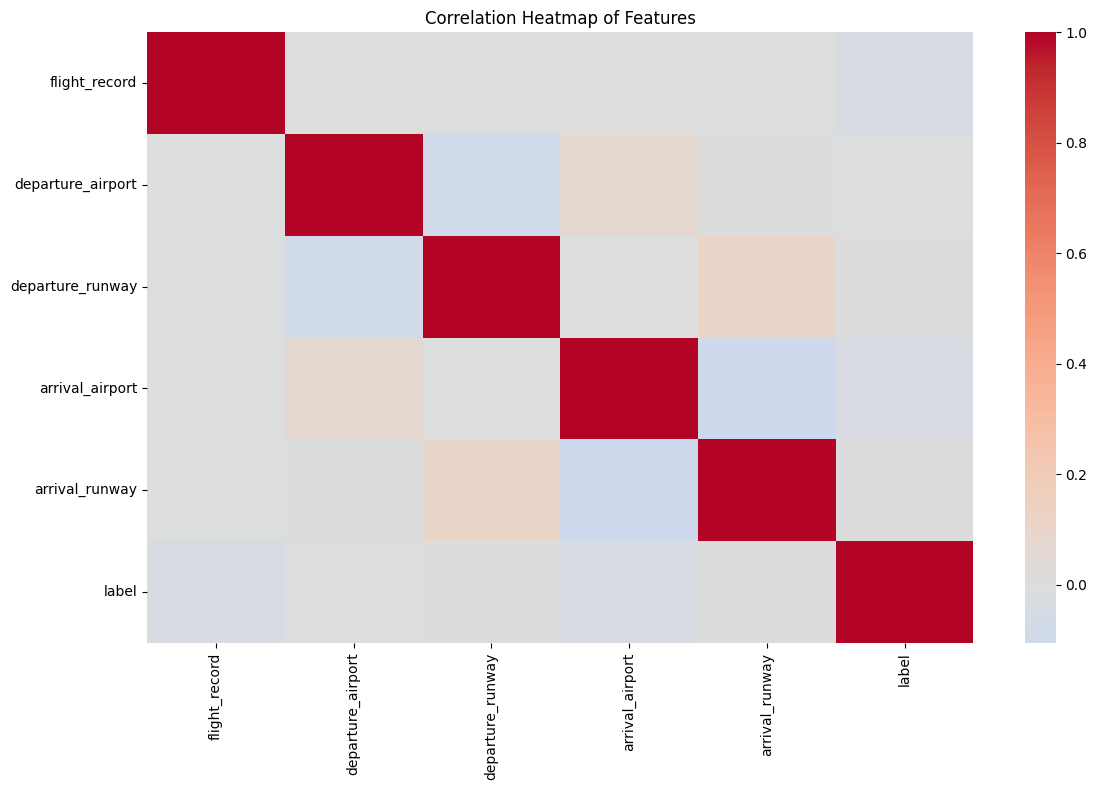

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()
# plt.savefig(os.path.join(PROCESSED_DATA_PATH, "correlation_heatmap.png"))

The correlation heatmap reveals no highly correlated features (|r| < 0.7), indicating that all variables likely contribute unique information.
The weak correlation between individual features and the anomaly label suggests that anomalies are complex and not linearly separable, supporting the choice of nonlinear models such as Isolation Forest or Autoencoders.

In [16]:
df.columns

Index(['flight_record', 'departure_airport', 'departure_runway',
       'arrival_airport', 'arrival_runway', 'label'],
      dtype='object')

In [17]:
print("\n🧠 EDA Summary:")
print(f"- Total samples: {df.shape[0]}")
print(f"- Total features: {df.shape[1]-1} (excluding label)")
print(f"- Classes: {df['label'].unique().tolist()}")
print(f"- Data appears {'balanced' if df['label'].value_counts(normalize=True).max() < 0.6 else 'imbalanced'}")
print("\n✅ EDA complete. Proceed to model training.")


🧠 EDA Summary:
- Total samples: 99837
- Total features: 5 (excluding label)
- Classes: [0, 1, 2, 3]
- Data appears imbalanced

✅ EDA complete. Proceed to model training.
